# Hypothesis Testing with Insurance Data (Core)
For this assignment, we will be working with the US Health Insurance Dataset from Kaggle.

We have been asked to use our hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Load the data

In [2]:
df = pd.read_csv('Data/insurance - insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Q1. Do smokers have higher insurance charges than non-smokers?

## 1. State your Null Hypothesis and Alternative Hypothesis

- Null Hypothesis: There is no difference in insurance charges between smokers and non-smokers.
- Alternative Hypothesis: There is a significant difference in insurance charges between smokers and non-smokers.

## 2. Select the correct test according to the data type and number of samples

- Numeric
- Two groups/ samples
- 2-sample T-Test will be run

### Explore and separate data for hypothesis

In [3]:
# See how many are smokers and non-smokers
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [8]:
# Create filter for smokers and non-smokers
smoker_df = df.loc[df['smoker']=='yes'].copy()
non_smoker_df = df.loc[df['smoker']=='no'].copy()

In [10]:
# Make a df just for visualization by concat the groups
plot_df = pd.concat([smoker_df, non_smoker_df])
plot_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768
...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411.6850
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335


In [9]:
# Define the feature of interest
smoker_charges = smoker_df['charges']
non_smoker_charges = non_smoker_df['charges']

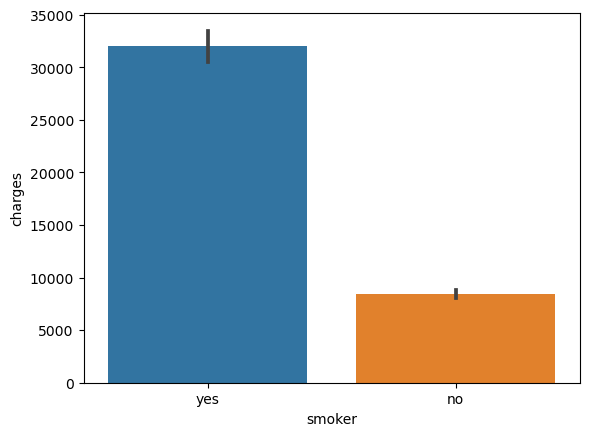

In [11]:
# Visualize the group means
sns.barplot(data=df, x='smoker', y='charges');

## 3. Test the assumptions of your selected test.

### Test Assumptions:
- No significant outliers
- Normality
- Equal Variance

#### Check for and remove outliers

In [12]:
# Check for outliers in charges for smoker group
smoker_outliers = np.abs(stats.zscore(smoker_charges)) > 3
smoker_outliers.sum()

0

- No outliers are found in the smoker group.

In [13]:
# Check for outliers in charges for non-smoker group
non_smoker_outliers = np.abs(stats.zscore(non_smoker_charges)) > 3 
non_smoker_outliers.sum()

24

In [14]:
# Remove outliers from non_smoker group ONCE!
non_smoker_charges = non_smoker_charges[(np.abs(stats.zscore(non_smoker_charges)) < 3)]

#### Test for Normality

In [15]:
# Test smoker group for normality
result_smoker = stats.normaltest(smoker_charges)
result_smoker

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [17]:
# Check n for smoker group
len(smoker_charges)

274

In [16]:
result_non_smoker = stats.normaltest(non_smoker_charges)
result_non_smoker

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

In [18]:
# Check n for non-smoker group
len(non_smoker_charges)

1040

- There is a large enough sample size to safely disregard the assumption of normality.

#### Check for Equal Variance

In [19]:
# Test for equal variance
result = stats.levene(smoker_charges, non_smoker_charges)
result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

- We met the assumption of normality but did NOT meet the assumption of equal variance. 
- We will therefore run a Welch's t-test instead by adding `equal_var=False` to `stats.ttest_ind`

## 4. Execute the selected test, or the alternative test (if you do not meet the assumptions)

In [21]:
result = stats.ttest_ind(smoker_charges, non_smoker_charges)
print(result)
result.pvalue < .05

Ttest_indResult(statistic=51.2078044173717, pvalue=3.68768124e-315)


True

## 5. Interpret your p-value and reject or fail to reject your null hypothesis 


We had a p-value < .05 for our Welch's t-test. We reject the null hypothesis and support the alternative that a significant difference in insurance charges between smokers and non-smokers.

## 6. Show a supporting visualization that helps display the result


In [27]:
print(f"The average charges for smoker group was ${smoker_charges.mean():.2f}")
print(f"The average charges for non-smoker group was ${non_smoker_charges.mean():.2f}")

The average charges for smoker group was $32050.23
The average charges for non-smoker group was $7939.86


# Q2. Are men more likely to smoke than women?

## 1. State your Null Hypothesis and Alternative Hypothesis

- Null Hypothesis: There is no relationship between a smoker's sex and whether they are more or less likely to smoke.
- Alternative Hypothesis: A smoker's sex can determine if they are more or less likely to smoke.

## 2. Select the correct test according to the data type and number of samples

- Categorical
- 2 sample/groups
- A Chi-Square test will be run

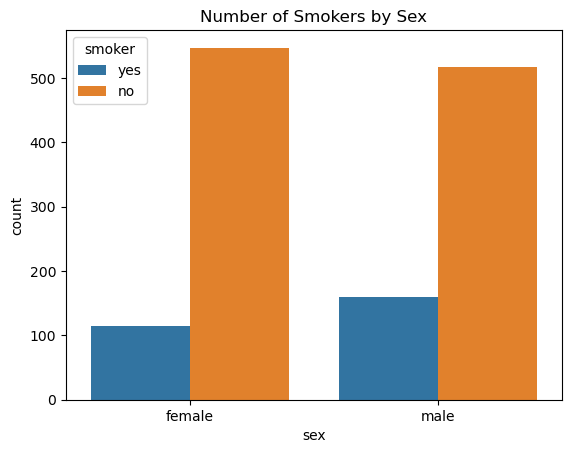

In [29]:
### Visualize smokers by sex
ax = sns.countplot(data=df, x='sex', hue='smoker')
ax.set_title("Number of Smokers by Sex");

## 3. Test the assumptions of your selected test.

### Test Assumptions:

- There are two categorical variables (ordinal or nominal)
- The outcomes are independent.

No further actions are needed before executing the Chi-Square Test.

## 4. Execute the selected test, or the alternative test (if you do not meet the assumptions)


In [31]:
# Runt the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result

In [32]:
# Print the p-value
print(p)
p < .05

0.006548143503580696


True

## 5. Interpret your p-value and reject or fail to reject your null hypothesis 


We had a p-value < .05 for our Chi-Square Test. We reject the null hypothesis and support the alternative that a smoker's sex can determine if they are more or less likely to smoke.

## 6. Show a supporting visualization that helps display the result


In [30]:
# Calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


### Initial Question: Are men more likely to smoke than women?

Based on the contingency table above, it appears men ARE more likely to smoke than women with the number of male smokers being 159 and female smokers being 115.

# Q3. Do different regions have different charges, on average?

## 1. State your Null Hypothesis and Alternative Hypothesis

- Null Hypothesis: There is no difference in charges for different regions.
- Alternative Hypothesis: There is a significant difference in charges for different regions.

## 2. Select the correct test according to the data type and number of samples

- Numeric
- More than two samples/groups
- An ANOVA test will be run.

### Visualize and seperate data for hypothesis

In [35]:
# Display value counts for 'region' column
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

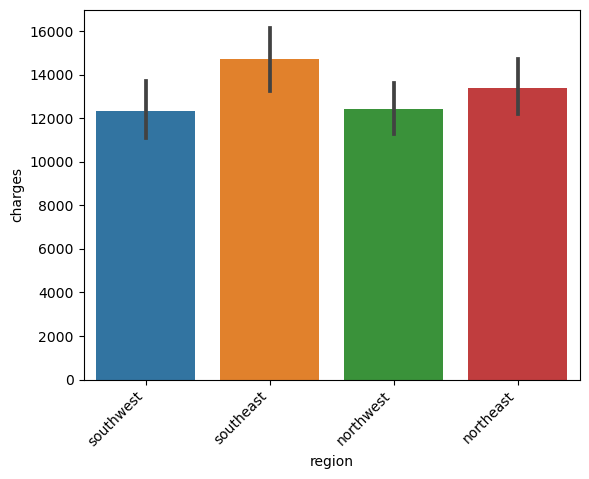

In [36]:
ax = sns.barplot(data=df, x='region', y='charges')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

In [40]:
## Create a dictionary with each group as keys and 'charges' as values
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [41]:
# Confirm loop produced desired result
groups['southwest']

0       16884.92400
12       1826.84300
15       1837.23700
18      10602.38500
19      36837.46700
           ...     
1316     1731.67700
1329    10325.20600
1331    10795.93733
1332    11411.68500
1336     2007.94500
Name: charges, Length: 325, dtype: float64

## 3. Test the assumptions of your selected test.

### Test Assumption
- No significant outliers
- Equal variance
- Normality

### Checking Assumption of No Signiificant Outliers

In [42]:
## Loop through groups dict
for region, data in groups.items():

    ## determine if there are any outliers
    outliers = np.abs(stats.zscore(data)) > 3
    
    ## print a statement about how many outliers for which group name
    print(f"There were {outliers.sum()} outliers in the {region} group.")

    ## Remove the outiers from data and overwrite the sector data in the dict
    data = data.loc[~outliers]
    groups[region] = data

There were 8 outliers in the southwest group.
There were 2 outliers in the southeast group.
There were 7 outliers in the northwest group.
There were 4 outliers in the northeast group.


### Test for Normality

In [44]:
## Running normal test on each group and confirming there are >20 in each group

## Save a list with an inner list of column names
norm_results = [['group','n','pval','sig?']]


## loop through group dict
for sector, data in groups.items():
    ## calculate normaltest results
    stat, p = stats.normaltest(data)
    
    ## Append the right info into norm_resutls (as a list)
    norm_results.append([sector,len(data), p, p<.05])
    
    
## Make norm_results a dataframe (first row is columns, everything else data)
normal_results = pd.DataFrame(norm_results[1:], columns = norm_results[0])
normal_results

,group,n,pval,sig?
0,southwest,317,7.728611e-22,True
1,southeast,362,1.936990e-13,True
2,northwest,318,2.940543e-19,True
3,northeast,320,3.557877e-17,True


- - We failed the assumption of normality, but the groups are large enough that we can safely disregard/ignore the assumption of normality.

### Test for Equal Variance

In [47]:
# Use Levene's test for equal variance 
result_equal = stats.levene(*groups.values())
print(result_equal)

LeveneResult(statistic=9.518349004554441, pvalue=3.2035503711783993e-06)


In [48]:
## Use an if-else to help interpret the p-value
if result_equal.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


The assumption of equal variance was not met.

## 4. Execute the selected test, or the alternative test (if you do not meet the assumptions)


In [52]:
## Running Krukal-Wallis Test for Original Hypothesis
result = stats.kruskal(*groups.values())
print(result)
result.pvalue<.05

KruskalResult(statistic=6.914045702545643, pvalue=0.07468847911322242)


False

## 5. Interpret your p-value and reject or fail to reject your null hypothesis 


### Results:
- The Kruskal-Wallis Test returned a p_value greater than .05. We fail to reject the hypothesis and conclude that there is no difference in charges for different regions.

## 6. Show a supporting visualization that helps display the result


In [54]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## save the values as charges and the labels to the region
values = df['charges']
labels = df['region']

In [55]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7245,-3428.9343,1451.3161,False
northeast,southeast,1329.0269,0.4745,-1044.9417,3702.9955,False
northeast,southwest,-1059.4471,0.6792,-3499.5723,1380.6781,False
northwest,southeast,2317.8361,0.0583,-54.1994,4689.8716,False
northwest,southwest,-70.638,0.9999,-2508.8826,2367.6066,False
southeast,southwest,-2388.4741,0.0477,-4760.5096,-16.4386,True


- Based on the the summary table above, all except for one group of results show no significant difference between charges and region.